In [7]:
from io import BytesIO
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
sns.set(style="whitegrid")

In [66]:
# load date
gdoc_url = 'https://docs.google.com/spreadsheets/d/1X1HTxkI6SqsdpNSkSSivMzpxNT-oeTbjFFDdEkXD30o/export?format=csv&id=1X1HTxkI6SqsdpNSkSSivMzpxNT-oeTbjFFDdEkXD30o&gid=695409533'
r = requests.get(gdoc_url)
data = r.content
df = pd.read_csv(BytesIO(data), index_col=None, header=0)

In [67]:
#preprocess data
df['Reviewer Rating'] = pd.to_numeric(df['Reviewer Rating'], errors='coerce')
df = df[['Whisky Name','Reviewer Rating', 'Whisky Region or Style']]
# df = df.dropna()
df['Whisky Region or Style'] = df['Whisky Region or Style'].str.lower()
df['Whisky Region or Style'] = df['Whisky Region or Style'].str.rstrip('s')
df = df[df['Reviewer Rating'] > 40]

# By Region

In [68]:
df_region = df.groupby('Whisky Region or Style').filter(lambda x: len(x) > 50)
# df_region.reset_index().drop('index',axis=1)

In [69]:
sort = df_region.groupby('Whisky Region or Style').aggregate([np.count_nonzero,np.median]).sort_values(by=('Reviewer Rating','median'))
order = sort.index[::-1]
count = sort[('Reviewer Rating','count_nonzero')].values[::-1]

<IPython.core.display.Javascript object>


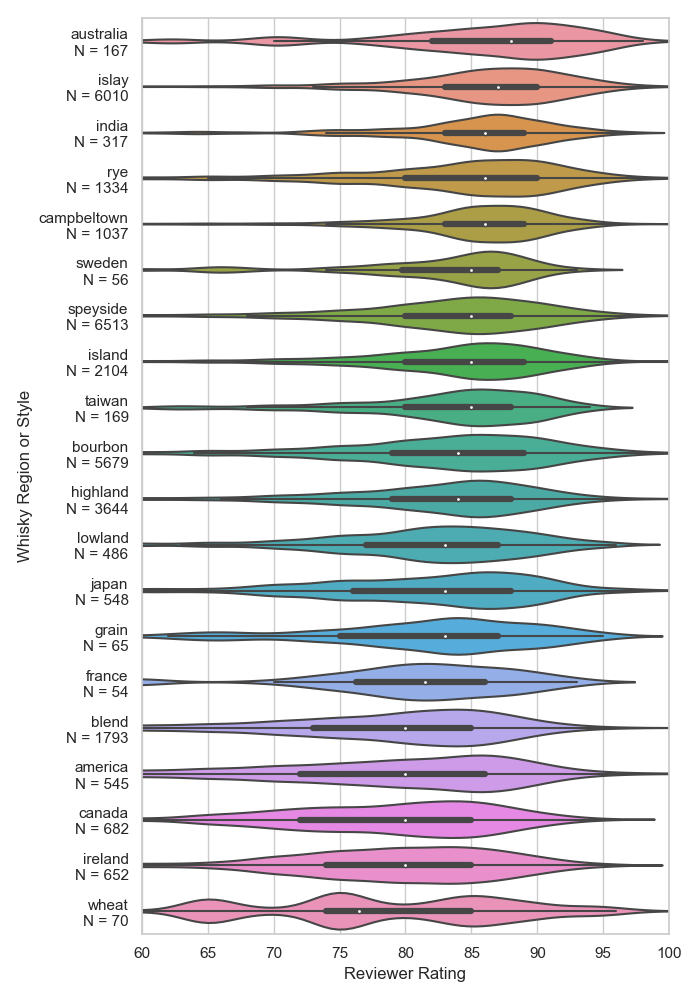

[Text(0, 0, 'australia\nN = 167'),
 Text(0, 1, 'islay\nN = 6010'),
 Text(0, 2, 'india\nN = 317'),
 Text(0, 3, 'rye\nN = 1334'),
 Text(0, 4, 'campbeltown\nN = 1037'),
 Text(0, 5, 'sweden\nN = 56'),
 Text(0, 6, 'speyside\nN = 6513'),
 Text(0, 7, 'island\nN = 2104'),
 Text(0, 8, 'taiwan\nN = 169'),
 Text(0, 9, 'bourbon\nN = 5679'),
 Text(0, 10, 'highland\nN = 3644'),
 Text(0, 11, 'lowland\nN = 486'),
 Text(0, 12, 'japan\nN = 548'),
 Text(0, 13, 'grain\nN = 65'),
 Text(0, 14, 'france\nN = 54'),
 Text(0, 15, 'blend\nN = 1793'),
 Text(0, 16, 'america\nN = 545'),
 Text(0, 17, 'canada\nN = 682'),
 Text(0, 18, 'ireland\nN = 652'),
 Text(0, 19, 'wheat\nN = 70')]

In [71]:
plt.figure(figsize=(7,10))
ax = sns.violinplot(y='Whisky Region or Style', x='Reviewer Rating', data=df_region, order=order, scale='width', bw=0.2)
ax.set_xlim(60,100)
# ax.tick_params(axis='y',labelrotation=45)
plt.tight_layout()

for i, label in enumerate(ax.get_yticklabels()):
    label.set_text(order[i] + '\n' + 'N = ' +  str(int(count[i])))
ax.set_yticklabels(ax.get_yticklabels())

# By Whisky

In [83]:
#extract first three words
df_whisky = df.copy()
df_whisky.loc[:,'Whisky Name'] = df_whisky['Whisky Name'].str.extract('([^\ ]+[\ ]*[^\ ]*[\ ]*[^\ ]*)',expand=False)
df_whisky = df_whisky.groupby('Whisky Name').filter(lambda x: len(x) > 10)
df_whisky

,Whisky Name,Reviewer Rating,Whisky Region or Style
5,1792 Full Proof,85.0,bourbon
6,1792 Full Proof,69.0,bourbon
7,1792 Full Proof,85.0,bourbon
8,1792 Full Proof,78.0,bourbon
9,1792 Full Proof,87.0,bourbon
...,...,...,...
33185,Laphroaig Quarter Cask,66.0,islay
33208,Wild Turkey 101,70.0,bourbon
33214,Springbank 15,90.0,campbeltown
33217,Elements of Islay,87.0,islay


In [85]:
#how many whiskies

n = 20

sort = df_whisky.groupby('Whisky Name').aggregate([np.count_nonzero,np.median]).sort_values(by=('Reviewer Rating','median')).tail(n)
order = sort.index[::-1]
count = sort[('Reviewer Rating','count_nonzero')].values[::-1]

In [ ]:
plt.figure(figsize=(7,10))
ax = sns.violinplot(y='Whisky Name', x='Reviewer Rating', data=df_whisky, order=order, scale='width', bw=0.18)
ax.set_xlim(80,100)
# ax.tick_params(axis='y',labelrotation=45)
plt.tight_layout()

for i, label in enumerate(ax.get_yticklabels()):
    region = df_whisky[df_whisky['Whisky Name'] == label.get_text()].iloc[0,2]
    label.set_text(order[i] + '\n' + region + ', N = ' +  str(int(count[i])))
ax.set_yticklabels(ax.get_yticklabels())

<IPython.core.display.Javascript object>

# By both

In [79]:
#extract first three words
region = 'islay'

df_whisky = df.copy()
df_whisky = df_whisky[df_whisky['Whisky Region or Style'] == region]
df_whisky.loc[:,'Whisky Name'] = df_whisky['Whisky Name'].str.extract('([^\ ]+[\ ]*[^\ ]*[\ ]*[^\ ]*)',expand=False)
df_whisky = df_whisky.groupby('Whisky Name').filter(lambda x: len(x) > 15)

In [80]:
#how many whiskies

n = 20

sort = df_whisky.groupby(df_whisky['Whisky Name'].str.extract('([^\ ]+[\ ]*[^\ ]*[\ ]*[^\ ]*)',expand=False)).aggregate([np.count_nonzero,np.median]).sort_values(by=('Reviewer Rating','median')).tail(n)
order = sort.index[::-1]
count = sort[('Reviewer Rating','count_nonzero')].values[::-1]

<IPython.core.display.Javascript object>


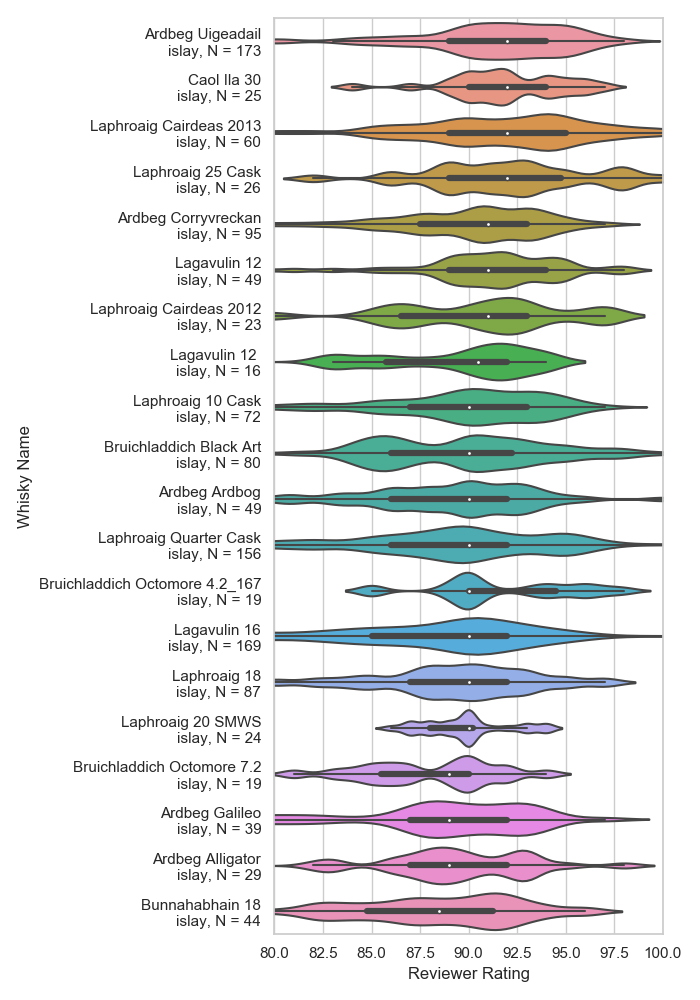

[Text(0, 0, 'Ardbeg Uigeadail\nislay, N = 173'),
 Text(0, 1, 'Caol Ila 30\nislay, N = 25'),
 Text(0, 2, 'Laphroaig Cairdeas 2013\nislay, N = 60'),
 Text(0, 3, 'Laphroaig 25 Cask\nislay, N = 26'),
 Text(0, 4, 'Ardbeg Corryvreckan\nislay, N = 95'),
 Text(0, 5, 'Lagavulin 12\nislay, N = 49'),
 Text(0, 6, 'Laphroaig Cairdeas 2012\nislay, N = 23'),
 Text(0, 7, 'Lagavulin 12 \nislay, N = 16'),
 Text(0, 8, 'Laphroaig 10 Cask\nislay, N = 72'),
 Text(0, 9, 'Bruichladdich Black Art\nislay, N = 80'),
 Text(0, 10, 'Ardbeg Ardbog\nislay, N = 49'),
 Text(0, 11, 'Laphroaig Quarter Cask\nislay, N = 156'),
 Text(0, 12, 'Bruichladdich Octomore 4.2_167\nislay, N = 19'),
 Text(0, 13, 'Lagavulin 16\nislay, N = 169'),
 Text(0, 14, 'Laphroaig 18\nislay, N = 87'),
 Text(0, 15, 'Laphroaig 20 SMWS\nislay, N = 24'),
 Text(0, 16, 'Bruichladdich Octomore 7.2\nislay, N = 19'),
 Text(0, 17, 'Ardbeg Galileo\nislay, N = 39'),
 Text(0, 18, 'Ardbeg Alligator\nislay, N = 29'),
 Text(0, 19, 'Bunnahabhain 18\nislay, N = 44

In [82]:
plt.figure(figsize=(7,10))
ax = sns.violinplot(y='Whisky Name', x='Reviewer Rating', data=df_whisky, order=order, scale='width', bw=0.18)
ax.set_xlim(80,100)
# ax.tick_params(axis='y',labelrotation=45)
plt.tight_layout()

for i, label in enumerate(ax.get_yticklabels()):
    region = df_whisky[df_whisky['Whisky Name'] == label.get_text()].iloc[0,2]
    label.set_text(order[i] + '\n' + region + ', N = ' +  str(int(count[i])))
ax.set_yticklabels(ax.get_yticklabels())